In [334]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

In [335]:
def amdahl(nworkers, p):
    return 1 / (1 - p + p/nworkers)

def efficiency(nworkers, p):
    return 1 /(nworkers * (1 - p + p/nworkers))

def expfit(nworkers,offset, decay1, decay2):
    return offset - decay1 * np.exp(-nworkers* decay2)
def linfit(nworkers, offset, slope):
    return offset + slope * nworkers

In [336]:
data_no_bunch = np.loadtxt("Results/scaling_no_batch.out", delimiter=",")
jobID = ['63', '66', '70', '77', '79']
Data = np.zeros((63, 4, len(jobID)))
for i in range(len(jobID)):
    Data[:,:,i] = np.loadtxt("Results/slurm-1374"+jobID[i]+".out", delimiter=",")
Data[:,0,:] = Data[:,0,:] -1
data_no_bunch[:,0] = data_no_bunch[:,0] -1

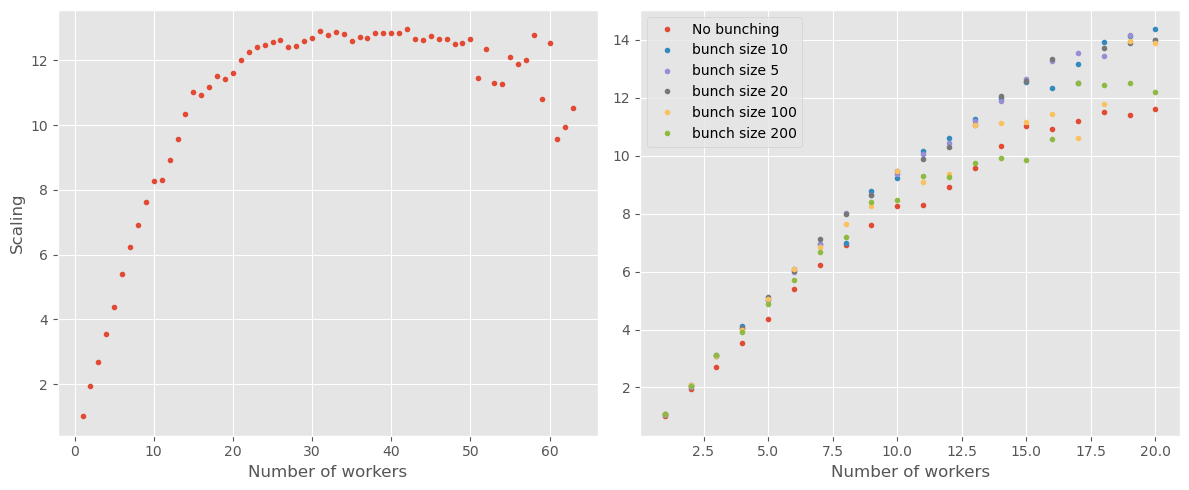

In [337]:
cut = 20
plt.style.use("ggplot")
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[1].plot(data_no_bunch[:cut,0], data_no_bunch[0,1]/data_no_bunch[:cut,1], '.', label='No bunching')
for i in range(len(jobID)):
    ax[1].plot(Data[:cut,0,i], data_no_bunch[0,1]/Data[:cut,1,i], '.', label=f'bunch size {int(Data[0,3,i])}')
ax[0].plot(data_no_bunch[:,0], (data_no_bunch[0,1]/data_no_bunch[:,1]),'.')
ax[0].set_ylabel('Scaling')
ax[0].set_xlabel('Number of workers')
ax[1].set_xlabel('Number of workers')
# ax[1].set_ylabel('scaling')
ax[1].legend()
fig.tight_layout()
tikzplotlib_fix_ncols(fig)
tikzplotlib.clean_figure()
tikzplotlib.save("init_scaling.tex", axis_width=r'\plotwidth', axis_height=r'\plotheight')


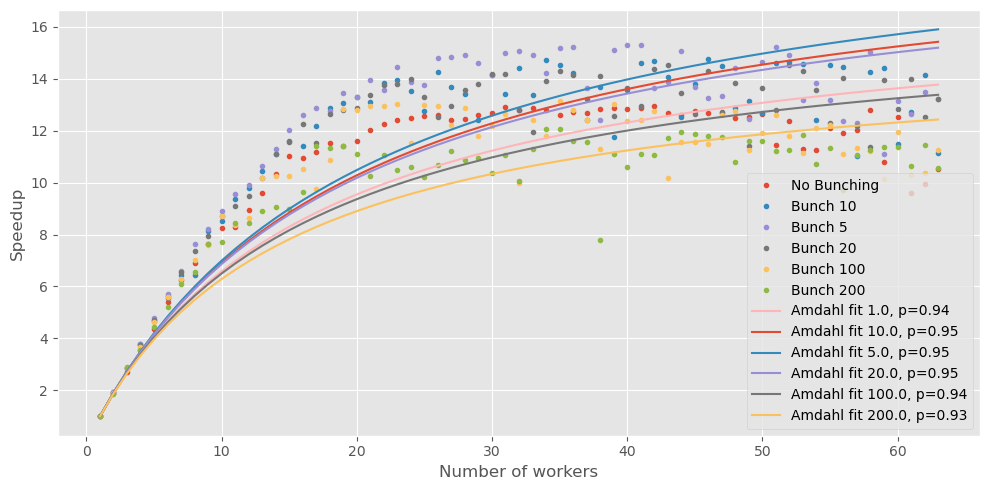

In [338]:
from scipy import optimize
fitval = np.zeros(len(jobID)+1)
fit = optimize.curve_fit(amdahl, data_no_bunch[:,0], data_no_bunch[0,1]/data_no_bunch[:,1])
fitval[0] = fit[0][0]
bunch_size = np.ones(len(jobID)+1)
for i in range(len(jobID)):
    fit = scipy.optimize.curve_fit(amdahl, Data[:,0,i], Data[0,1,i]/Data[:,1,i])
    fitval[i+1] = fit[0][0]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_no_bunch[:,0], data_no_bunch[0,1]/data_no_bunch[:,1], '.', label='No Bunching')
for i in range(len(jobID)):
    ax.plot(Data[:,0,i], Data[0,1,i]/Data[:,1,i], '.', label=f'Bunch {int(Data[0,3,i])}')
    bunch_size[i+1] = int(Data[0,3,i])

for i in range(len(jobID)+1):
    ax.plot(data_no_bunch[:,0], amdahl(data_no_bunch[:,0], fitval[i]), label=f'Amdahl fit {bunch_size[i]}, p={fitval[i]:.2f}')
ax.set_xlabel('Number of workers')
ax.set_ylabel('Speedup')
ax.legend()
fig.tight_layout()

In [339]:
data_5a = np.loadtxt("Results/n_cuts5_1.out", delimiter=",",usecols=[0,1,2,3,4,5])
# data_5b = np.loadtxt("Results/n_cuts5_2.out", delimiter=",",usecols=[0,1,2,3,4,5])
# data_5c = np.loadtxt("Results/n_cuts5_3.out", delimiter=",",usecols=[0,1,2,3,4,5])


data_5a = data_5a[:117,:]
data_5b = np.loadtxt("Results/n_cuts5_16.txt", delimiter=",",usecols=[0,1,2,3,4,5])
data_5c = np.loadtxt("Results/n_cuts5_32.txt", delimiter=",",usecols=[0,1,2,3,4,5])
data_5d = np.loadtxt("Results/n_cuts5_64.txt", delimiter=",",usecols=[0,1,2,3,4,5])
data_5e = np.loadtxt("Results/n_cuts5_128.txt", delimiter=",",usecols=[0,1,2,3,4,5])

data_5 = np.concatenate((data_5a, data_5b), axis=0)
data_5 = np.concatenate((data_5, data_5c), axis=0)
data_5 = np.concatenate((data_5, data_5d), axis=0)
data_5 = np.concatenate((data_5, data_5e), axis=0)

print(np.sum(data_5[:,0] == 128))

299


835.6659615039825
508.5509624481201
491.6036298274994
611.399090051651
574.8299932479858
554.5466191768646
290.39563393592834


Text(0, 0.5, 'Time [s]')

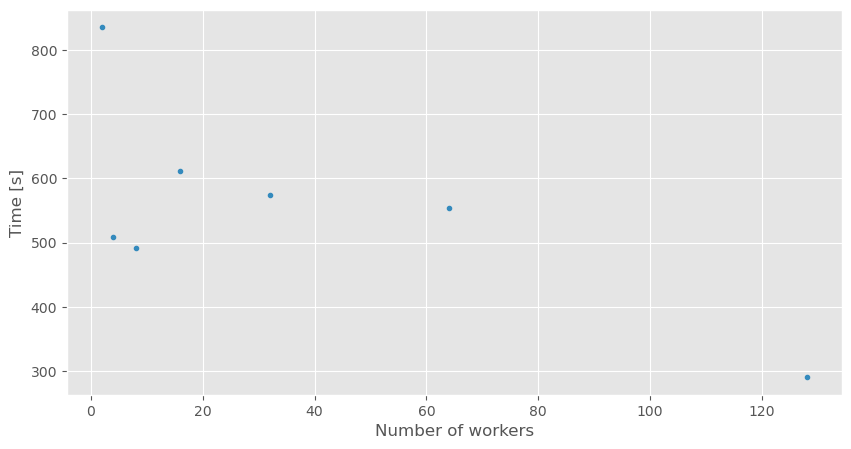

In [340]:
workers = np.array([2, 4, 8, 16, 32, 64, 128])

fig, ax = plt.subplots(figsize=(10,5))
t0 = data_5[0,1]
for i in range(len(workers)):
    mask = np.arange(len(data_5[:,0]))[data_5[:,0] == workers[i]]
    ax.plot(data_5[mask[0],0], data_5[mask[0],1], '.',color= "C1" , label=f'{workers[i]} workers')
    print(data_5[mask[0],1])
ax.set_xlabel('Number of workers')
ax.set_ylabel('Time [s]')
# ax.plot(data_5[:,0], data_5[:,1], '.', label='5 cuts')

C:\Users\Jens\AppData\Local\Temp\ipykernel_19844\1469538487.py:8: RuntimeWarning: overflow encountered in exp
  return offset - decay1 * np.exp(-nworkers* decay2)
C:\Users\Jens\AppData\Local\Temp\ipykernel_19844\1469538487.py:8: RuntimeWarning: overflow encountered in multiply
  return offset - decay1 * np.exp(-nworkers* decay2)


[ 1.63745823  2.93225888  6.57619373  4.42091213  8.40580406 15.84701121
 16.05615789]
[ 12.40793543   8.04977786  19.29807587  22.79965933  51.17622356
 110.0410543  191.05534978]
[ 12.40793543   8.04977786  19.29807587  22.79965933  51.17622356
 110.0410543  191.05534978]


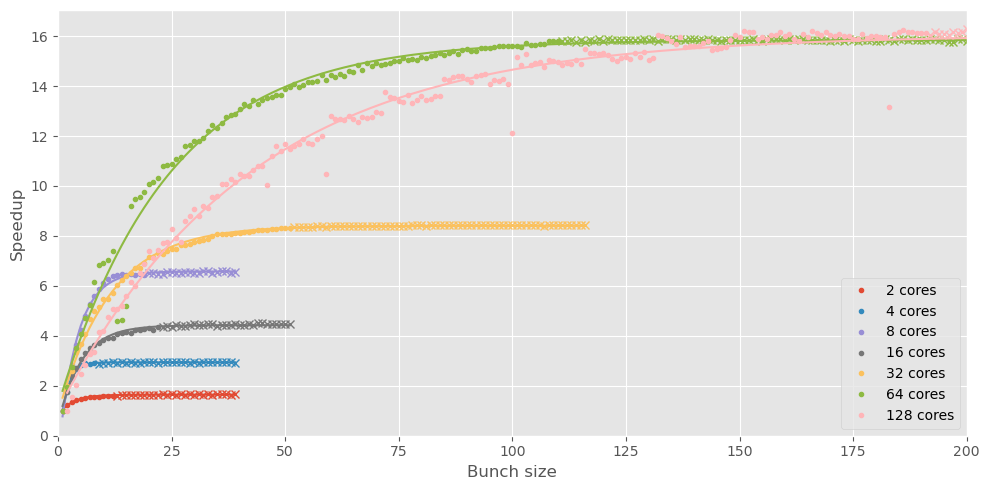

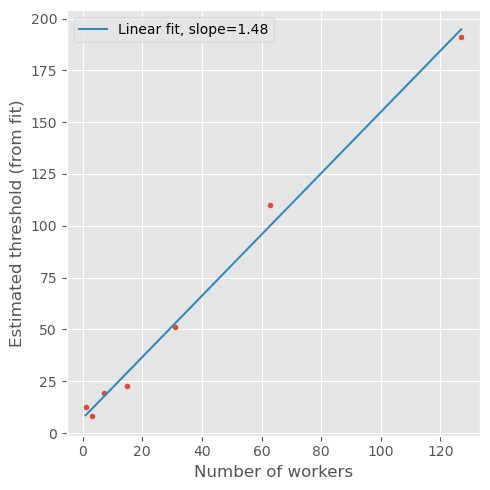

In [341]:

max_scaling = np.zeros(len(workers))
n_threshold = np.zeros(len(workers))
fig, ax = plt.subplots(figsize=(10,5))
for i in range(len(workers)):
    mask = np.arange(len(data_5))[data_5[:,0] == workers[i]]
    CN = 'C'+str(i)
    fit = scipy.optimize.curve_fit(expfit, data_5[mask,3], data_5[mask[0],2]/data_5[mask,2])
    fita = scipy.optimize.curve_fit(amdahl, data_5[mask,3], data_5[mask[0],2]/data_5[mask,2])
    # ax.plot(data_5[mask,3], amdahl(data_5[mask,3], fit[0][0]),color=CN, label=f'Amdahl fit {workers[i]-1}, p={fit[0][0]:.2f}')
    ax.plot(data_5[mask,3], expfit(data_5[mask,3],fit[0][0],fit[0][1],fit[0][2]),color=CN) #label=f'exp fit {workers[i]-1}, s_max={fit[0][0]:.2f}')
    # ax.plot(data_5[mask,3], amdahl(data_5[mask,3], fita[0][0]),color=CN)#,color=CN, label=f'Amdahl fit {workers[i]-1}, p={fita[0][0]:.2f}'
    max_scaling[i] = fit[0][0]
    n_threshold[i] = - np.log(0.01*fit[0][0]/fit[0][1])/fit[0][2]
    datax = data_5[mask,3]
    datay = data_5[mask[0],2]/data_5[mask,2]
    ax.plot(datax[datax<=n_threshold[i]], datay[datax<=n_threshold[i]], '.', color=CN, label=f'{workers[i]} cores')
    ax.plot(datax[datax>n_threshold[i]], datay[datax>n_threshold[i]], 'x', color=CN)#, label=f'{workers[i]} cores')
    
ax.set_ylabel('Speedup')
ax.set_xlabel('Bunch size')
ax.set_xlim(0, 200)
ax.legend()
fig.tight_layout()
print(max_scaling)
print(n_threshold)

tikzplotlib_fix_ncols(fig)
tikzplotlib.clean_figure()
tikzplotlib.save("bunch_scaling.tex", axis_width=r'\plotwidth', axis_height=r'\plotheight')

fig, ax = plt.subplots(figsize=(5,5))   

fit = scipy.optimize.curve_fit(linfit, workers-1, n_threshold)
ax.plot(workers-1, n_threshold, '.')
ax.plot(workers-1, linfit(workers-1, fit[0][0], fit[0][1]), label=f'Linear fit, slope={fit[0][1]:.2f}')
print(n_threshold)
# ax.plot(workers-1, linfit(workers-1, fit[0][0], fit[0][1]), label=f'Linear fit, slope={fit[0][1]:.2f}')
ax.set_xlabel('Number of workers')
ax.set_ylabel('Estimated threshold (from fit)')
ax.legend()
fig.tight_layout()

tikzplotlib_fix_ncols(fig)
tikzplotlib.clean_figure()
tikzplotlib.save("threshold.tex", axis_width=r'\plotwidth', axis_height=r'\plotheight')

(787,)


C:\Users\Jens\AppData\Local\Temp\ipykernel_19844\2507108760.py:2: RuntimeWarning: divide by zero encountered in divide
  data_5_scaling = data_0/data_5[:,2]


Text(0.5, 0, 'Bunch size')

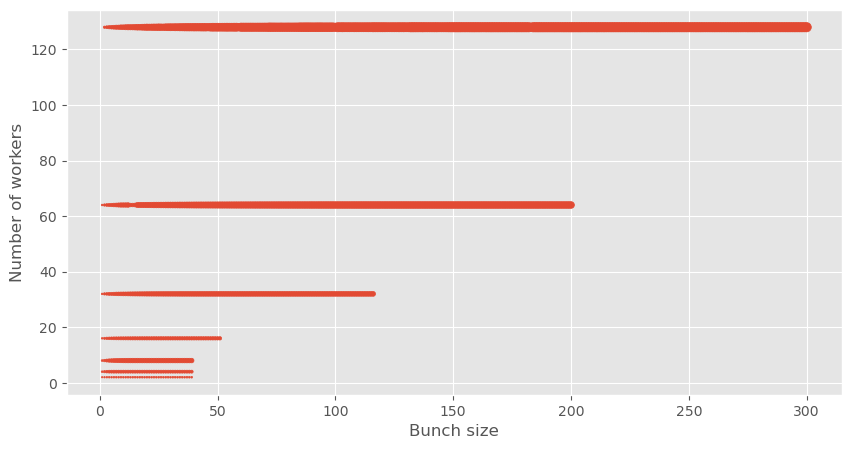

In [342]:
data_0 = np.loadtxt("Results/t0.txt")
data_5_scaling = data_0/data_5[:,2]
print(data_5_scaling.shape)
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data_5[:,3], data_5[:,0], s=data_5_scaling*100)
ax.set_ylabel('Number of workers')
ax.set_xlabel('Bunch size')

[2.00000000e+00 8.35665962e+02 8.35741864e+02 1.00000000e+00
 4.48089281e+01 3.86682649e-02]


Text(0, 0.5, 'scaling')

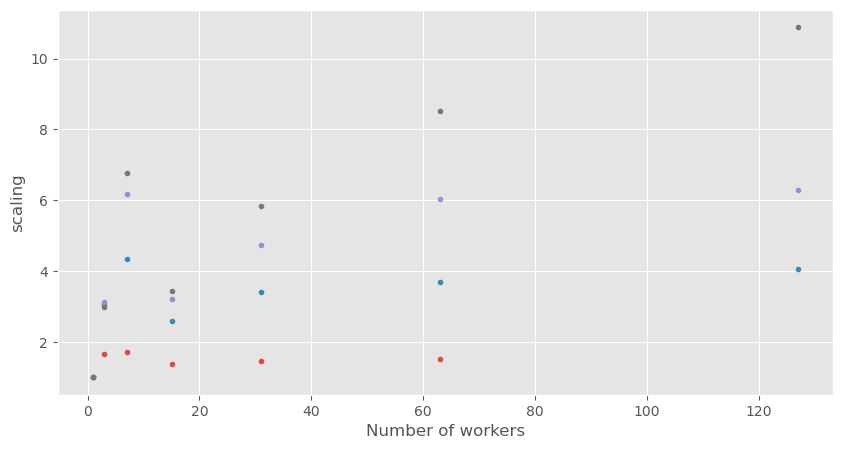

In [343]:
print(data_5[0,:])
fig, ax = plt.subplots(figsize=(10,5))
for bunching in [1, 4, 8, 16]:
    mask = np.arange(len(data_5))[data_5[:,3] == bunching]
    ax.plot(data_5[mask,0]-1, data_5[mask[0],2]/data_5[mask,2],'.', label=f'Bunch size {bunching}')

# ax.legend()
ax.set_xlabel('Number of workers')
ax.set_ylabel('scaling')
    

In [344]:
print(3*64)
print(np.floor(1.3)+1)

192
2.0


0.9423433933056166 0.9512914378143066 0.9434151569893541


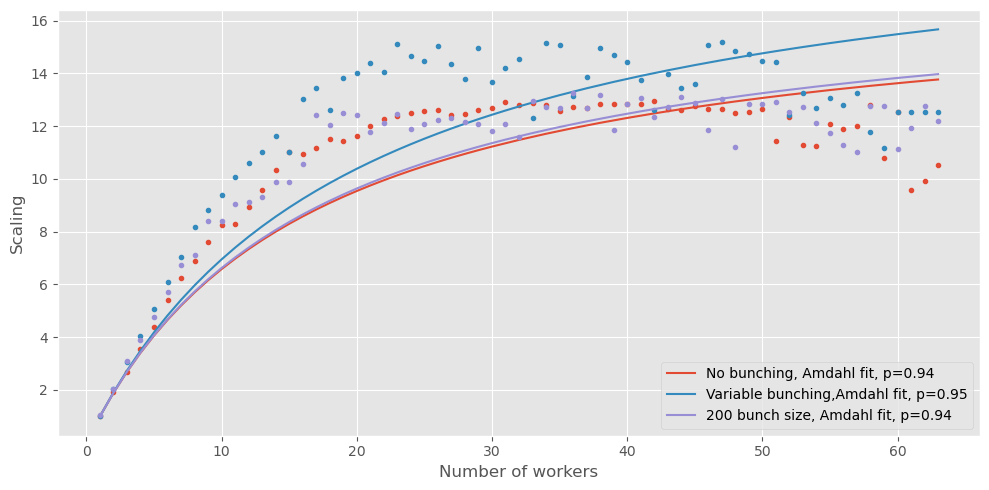

In [345]:
data_varbunch = np.loadtxt("Results/variable_bunching.txt", delimiter=",", usecols=[0,1,2,3,4,5])
data_200bunch = np.loadtxt("Results/200bunch.txt", delimiter=",", usecols=[0,1,2,3,4,5])
fig, ax = plt.subplots(figsize=(10,5))
data_varbunch[:,0] = data_varbunch[:,0] -1
data_200bunch[:,0] = data_200bunch[:,0] -1
# print(data_varbunch[:,0])
# print(data_no_bunch[:,0])
# print(data_200bunch[:,0])
fita = scipy.optimize.curve_fit(amdahl, data_no_bunch[:,0], data_no_bunch[0,1]/data_no_bunch[:,1])
fitb = scipy.optimize.curve_fit(amdahl, data_varbunch[:,0], data_no_bunch[0,1]/data_varbunch[:,1])
fitc = scipy.optimize.curve_fit(amdahl, data_200bunch[:,0], data_no_bunch[0,1]/data_200bunch[:,1])
print(fita[0][0], fitb[0][0], fitc[0][0])
ax.plot(data_no_bunch[:,0], (data_no_bunch[0,1]/data_no_bunch[:,1]),'.',  color='C0')
ax.plot(data_no_bunch[:,0], amdahl(data_no_bunch[:,0], fita[0][0]), label=f'No bunching, Amdahl fit, p={fita[0][0]:.2f}', color='C0')
ax.plot(data_varbunch[:,0], (data_no_bunch[0,1]/data_varbunch[:,1]),'.',  color='C1')
ax.plot(data_varbunch[:,0], amdahl(data_varbunch[:,0], fitb[0][0]), label=f'Variable bunching,Amdahl fit, p={fitb[0][0]:.2f}', color='C1')
ax.plot(data_200bunch[:,0], (data_no_bunch[0,1]/data_200bunch[:,1]),'.', color='C2')
ax.plot(data_200bunch[:,0], amdahl(data_200bunch[:,0], fitc[0][0]), label=f'200 bunch size, Amdahl fit, p={fitc[0][0]:.2f}', color='C2')
ax.set_ylabel('Scaling')
ax.set_xlabel('Number of workers')
ax.legend()
fig.tight_layout()
# print(data_no_bunch[:,0]-data_200bunch[:,0])
tikzplotlib_fix_ncols(fig)
tikzplotlib.clean_figure()
tikzplotlib.save("bunching_comparison.tex", axis_width=r'\plotwidth', axis_height=r'\plotheight')
# 0.9541599178841861 0.9638958884811887 0.9532537915847688

0.9423433933056166 0.9512914378143066 0.9434151569893541


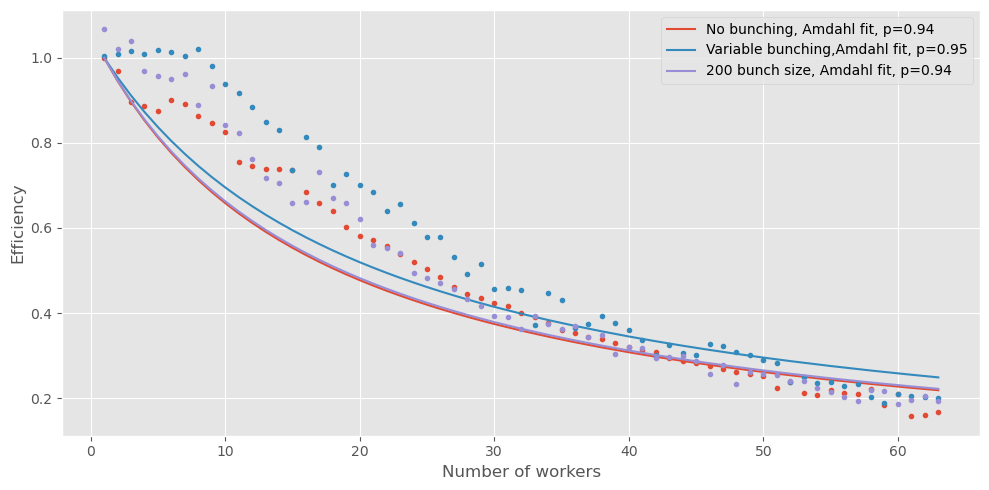

In [346]:
data_varbunch = np.loadtxt("Results/variable_bunching.txt", delimiter=",", usecols=[0,1,2,3,4,5])
data_200bunch = np.loadtxt("Results/200bunch.txt", delimiter=",", usecols=[0,1,2,3,4,5])
fig, ax = plt.subplots(figsize=(10,5))
data_varbunch[:,0] = data_varbunch[:,0] -1
data_200bunch[:,0] = data_200bunch[:,0] -1
# print(data_varbunch[:,0])
# print(data_no_bunch[:,0])
# print(data_200bunch[:,0])
fita = scipy.optimize.curve_fit(amdahl, data_no_bunch[:,0], data_no_bunch[0,1]/data_no_bunch[:,1])
fitb = scipy.optimize.curve_fit(amdahl, data_varbunch[:,0], data_no_bunch[0,1]/data_varbunch[:,1])
fitc = scipy.optimize.curve_fit(amdahl, data_200bunch[:,0], data_no_bunch[0,1]/data_200bunch[:,1])
print(fita[0][0], fitb[0][0], fitc[0][0])
ax.plot(data_no_bunch[:,0], (data_no_bunch[0,1]/data_no_bunch[:,1])/data_200bunch[:,0],'.',  color='C0')
ax.plot(data_no_bunch[:,0], amdahl(data_no_bunch[:,0], fita[0][0])/data_200bunch[:,0], label=f'No bunching, Amdahl fit, p={fita[0][0]:.2f}', color='C0')
ax.plot(data_varbunch[:,0], (data_no_bunch[0,1]/data_varbunch[:,1])/data_200bunch[:,0],'.',  color='C1')
ax.plot(data_varbunch[:,0], amdahl(data_varbunch[:,0], fitb[0][0])/data_200bunch[:,0], label=f'Variable bunching,Amdahl fit, p={fitb[0][0]:.2f}', color='C1')
ax.plot(data_200bunch[:,0], (data_no_bunch[0,1]/data_200bunch[:,1])/data_200bunch[:,0],'.', color='C2')
ax.plot(data_200bunch[:,0], amdahl(data_200bunch[:,0], fitc[0][0])/data_200bunch[:,0], label=f'200 bunch size, Amdahl fit, p={fitc[0][0]:.2f}', color='C2')
ax.set_ylabel('Efficiency')
ax.set_xlabel('Number of workers')
# ax.set_xlim(0, 50)
ax.legend()
fig.tight_layout()
# print(data_no_bunch[:,0]-data_200bunch[:,0])
tikzplotlib_fix_ncols(fig)
tikzplotlib.clean_figure()
tikzplotlib.save("bunching_comparison_eff.tex", axis_width=r'\plotwidth', axis_height=r'\plotheight')
# 0.9541599178841861 0.9638958884811887 0.9532537915847688

In [347]:
print(data_no_bunch[:,0])
print(data_no_bunch[:,1])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63.]
[9.02224755 4.6570158  3.35381246 2.54753208 2.06319737 1.67017078
 1.44536328 1.30684066 1.18410087 1.09170675 1.08705783 1.01007724
 0.9412303  0.87235594 0.81758189 0.82494092 0.80654955 0.78378987
 0.78988528 0.77664566 0.75096464 0.73505807 0.72752976 0.72257876
 0.71804357 0.71493077 0.72600412 0.72434831 0.71606207 0.71158338
 0.69930577 0.70543575 0.70146847 0.70434928 0.71665335 0.70839119
 0.71060896 0.70204258 0.70196104 0.70206308 0.701895   0.69620275
 0.7120986  0.71495652 0.70672822 0.71226835 0.71244836 0.72154403
 0.7197082  0.71294856 0.7885263  0.72982025 0.79854059 0.80135632
 0.74595523 0.75858092 0.75112343 0.7049551  0.83537436 0.71972704
 0.94139981 0.90861893 0.85676169]


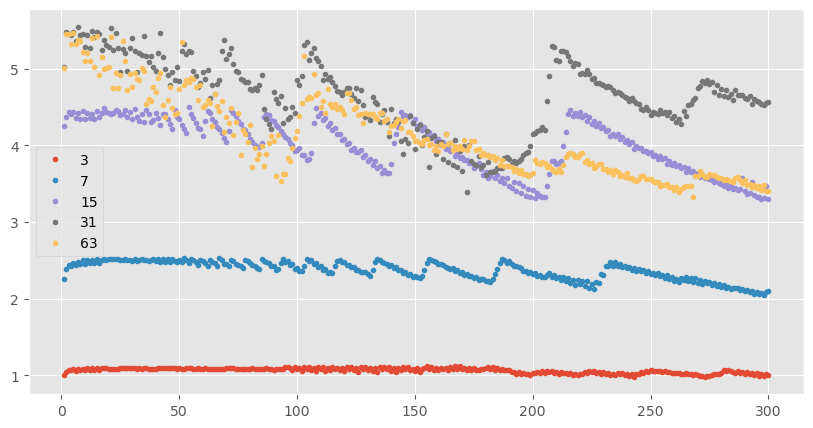

In [351]:
def invpow(nworkers, p):
    return p/nworkers

bunchtest_right = [3, 7, 15, 31, 63]
data_bunchcap = np.zeros((len(bunchtest_right)+1, 300))
for i in range(len(bunchtest_right)):
    data_bunchcap[i+1,:] = np.loadtxt(f"Results/{bunchtest_right[i]}_bunchtest.txt",skiprows=2, delimiter=",", usecols=[1])
data_bunchcap[0,:] = np.loadtxt(f"Results/3_bunchtest.txt",skiprows=2, delimiter=",", usecols=[3])


fig, ax = plt.subplots(figsize=(10,5))
for i in range(len(bunchtest_right)):
    ax.plot(data_bunchcap[0,:],data_bunchcap[1,0]/data_bunchcap[i+1,:],'.', label=f'{bunchtest_right[i]}')
ax.legend()

[166.  51.  53.   6.   4.]
6561


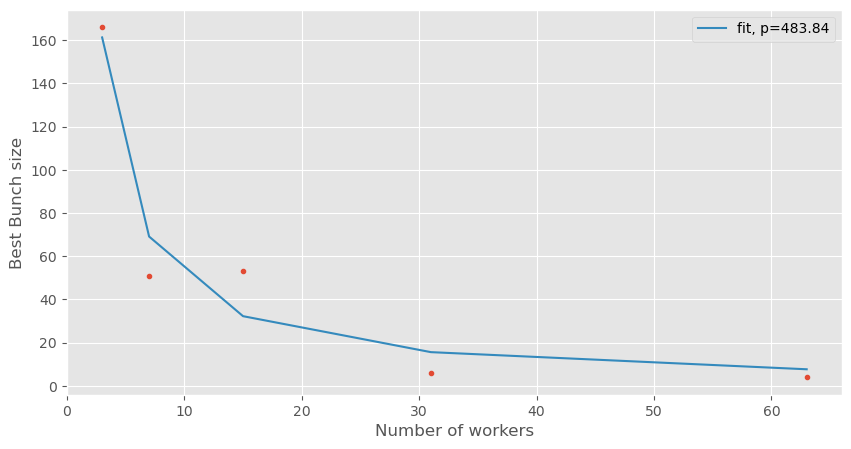

In [349]:
fig, ax = plt.subplots(figsize=(10,5))
index_max = np.zeros(len(bunchtest_right))
for i in range(len(bunchtest_right)):
    index_max[i] = np.argmax(data_bunchcap[i+1,0]/data_bunchcap[i+1,:])
print(index_max)
ax.plot(bunchtest_right, index_max, '.')
print(3**8)
fit = scipy.optimize.curve_fit(invpow, bunchtest_right, index_max)
ax.plot(bunchtest_right, invpow(bunchtest_right, fit[0][0]), label=f'fit, p={fit[0][0]:.2f}')
# ax.plot(data_bunchcap[0,:],data_bunchcap[i+1,0]/data_bunchcap[i+1,:], label=f'{bunchtest_right[i]}')
ax.set_ylabel('Best Bunch size')
ax.set_xlabel('Number of workers')
# ax.set_xlim(0, 100)
ax.legend()